In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("../../media/data/art/cksum.csv", error_bad_lines=False, header=None, usecols=[0,1])
df["value"] = df[1].apply(lambda x: x.split()[1]).apply(lambda x: int(x,16))
df = df.sample(len(df.index))
df.reset_index(drop=True,inplace=True)
df.head()

,0,1,value
0,185.162.184.34.52281 > delton.51575: Flags...,cksum 0xbb18 (correct),47896
1,delton.43232 > mba01s07-in-f14.1e100.net.h...,cksum 0xc81e (correct),51230
2,185.162.184.34.52281 > delton.51575: Flags...,cksum 0xdb5a (correct),56154
3,delton.51575 > 185.162.184.34.52281: Flags...,cksum 0x8026 (correct),32806
4,delton.60042 > mba01s07-in-f10.1e100.net.h...,cksum 0x7ed1 (correct),32465


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375153 entries, 0 to 375152
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       375153 non-null  object
 1   1       375153 non-null  object
 2   value   375153 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 8.6+ MB


In [4]:
df["x"] = np.random.rand(len(df.index)) * 100000 * np.random.rand(len(df.index))
df["y"] = np.random.rand(len(df.index)) * 100000

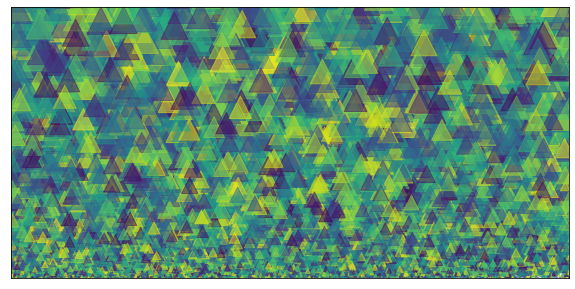

In [5]:
plt.figure(figsize=(10,5))

for i in list(df["value"].unique()):
    marker = np.random.choice(["x","o","<",">","^",","])

plt.xticks([])
plt.yticks([])

plt.xlim(0,80000)
plt.ylim(0,80000)
    
plt.scatter(df["x"], df["y"], marker=marker, c=df["value"], s=df["y"]/100, alpha=0.5)
plt.show();